In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import os
import tensorflow as tf
import numpy as np

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets('data/mnist', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/mnist\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/mnist\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/mnist\t10k-images-idx3-ubyte.gz
Extracting data/mnist\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
x_train = mnist.train.images
x_test = mnist.test.images
x_val = mnist.validation.images

In [6]:
y_train = mnist.train.labels
y_test = mnist.test.labels
y_val = mnist.validation.labels

In [7]:
x_train.shape

(55000, 784)

In [8]:
# One hot encoder

y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [9]:
x = tf.placeholder(tf.float32, ([None, 784]))
y = tf.placeholder(tf.float32, [None, 10])

In [10]:
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
#Model hyper parametters

learning_rate = 0.01
batch_size = 128
nb_epochs = 100

In [12]:
#Define graph
logits = tf.matmul(x, W) + b
y_pred = tf.nn.softmax(logits=logits)

In [13]:
# Loss function
entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y)
loss = tf.reduce_mean(entropy)
correct_pred = tf.equal(tf.arg_max(y_pred, 1), tf.arg_max(y, 1))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Instructions for updating:
Use `tf.math.argmax` instead


In [14]:
# Accuracy
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [15]:
# Optimizer

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

In [16]:
# Init Variables
init = tf.global_variables_initializer()

In [17]:
sess = tf.Session()
sess.run(init)

In [18]:
nb_batch = x_train.shape[0] // batch_size
for i in range(nb_epochs):
    for _ in range(nb_batch):
        x_batch, y_batch = mnist.train.next_batch(batch_size=batch_size)
        _, batch_loss = sess.run([optimizer, loss], feed_dict={x: x_batch, y: y_batch})
    if i % 10 == 0:
        _, val_loss, val_accuracy = sess.run([optimizer, loss, accuracy], feed_dict={x: x_val, y: y_val})
        print("Epochs: {} \t Val_loss: {} \t Val_accuracy: {}".format(i, val_loss, val_accuracy))

Epochs: 0 	 Val_loss: 0.2923501431941986 	 Val_accuracy: 0.9174000024795532
Epochs: 10 	 Val_loss: 0.30389824509620667 	 Val_accuracy: 0.9182000160217285
Epochs: 20 	 Val_loss: 0.323243647813797 	 Val_accuracy: 0.9178000092506409
Epochs: 30 	 Val_loss: 0.33347243070602417 	 Val_accuracy: 0.9161999821662903
Epochs: 40 	 Val_loss: 0.34502872824668884 	 Val_accuracy: 0.9120000004768372
Epochs: 50 	 Val_loss: 0.3416067957878113 	 Val_accuracy: 0.9143999814987183
Epochs: 60 	 Val_loss: 0.343277245759964 	 Val_accuracy: 0.9210000038146973
Epochs: 70 	 Val_loss: 0.354299396276474 	 Val_accuracy: 0.9187999963760376
Epochs: 80 	 Val_loss: 0.36280855536460876 	 Val_accuracy: 0.9138000011444092
Epochs: 90 	 Val_loss: 0.36344218254089355 	 Val_accuracy: 0.9174000024795532


In [19]:
_, test_loss, test_accuracy = sess.run([optimizer, loss, accuracy], feed_dict={x : x_test, y : y_test})
print("Epochs: {} \t Test_loss: {} \t Test_accuracy = {}".format(i, test_loss, test_accuracy))

Epochs: 99 	 Test_loss: 0.41677066683769226 	 Test_accuracy = 0.9093999862670898


In [20]:
import matplotlib.pyplot as plt

def show_result(x_true, y_true):
    plt.imshow(x_true.reshape(28, 28))
    print(np.argmax(y_true))
    y_preds = sess.run(y_pred, feed_dict={x : [x_true]}) 
    print(np.argmax(y_preds))

3
3


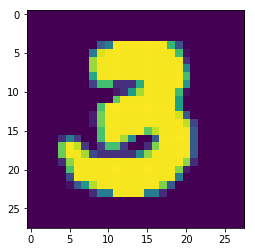

In [21]:
show_result(x_test[200], y_test[200])
